Python을 활용한 기본 통계 응용에 초점 맞추기 -> 기술 통계량, 랜덤 수, 확률 변수, 분포 및 가설 검정 계산 알아보기

## 모듈 임포트하기
주로 Scipy의 Stats 모듈로 작업

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 통계 및 확률 리뷰
**통계**: 통찰력을 얻고 결론을 도출하며 의사 결정을 뒷받침 할 목적으로 자료를 수집하고 분석하는 작업

전체 모집단을 조사할 수 없을 때 랜덤으로 선택한 표본으로 연구 가능하며 기술 통계량을 계산해 전체 모집단의 속성을 오차 위험을 통제하면서 체계적으로 추론 가능

In [2]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x) # 평균

3.1

In [3]:
np.median(x) # 중앙값

3.0

In [4]:
x.min(), x.max()

(0.9, 6.7)

In [5]:
x.var(), x.std() # 분산, 표준편차

(3.0700000000000007, 1.7521415467935233)

In [6]:
# 표본의 분산과 표준편차의 불편 추정값을 계산하려면 ddof = 1
x.var(ddof=1), x.std(ddof=1)

(3.5085714285714293, 1.8731181032095732)

### 랜덤 수

In [7]:
np.random.rand() # 0 ~1 사이의 균일 분포된 부동소수점 수치 생성

0.563992573460956

In [8]:
np.random.randn() # 평균 정규 분포를 따르는 랜덤 수

0.7259795772310356

In [9]:
# 랜덤 수의 배열 만들기
np.random.rand(5) # 길이 5

array([0.30004213, 0.74207092, 0.91815636, 0.44769131, 0.31750953])

In [10]:
np.random.rand(2, 4) # 2 * 4 배열 생성

array([[0.3229027 , 0.03317915, 0.77471511, 0.23667876],
       [0.58998465, 0.78082783, 0.67155442, 0.47202317]])

In [11]:
np.random.randint(10, size=10) # 상한, 크기

array([3, 7, 9, 2, 4, 8, 7, 3, 9, 8])

In [12]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[10, 13, 10, 12, 13, 10, 11, 18, 19, 18],
       [16, 19, 17, 14, 17, 14, 18, 18, 14, 15]])

- rand, randint: 분포는 균일해 보이지만 다른 범위와 유형을 가짐
- randn: 0을 중심으로 한 가우스 곡선과 유사

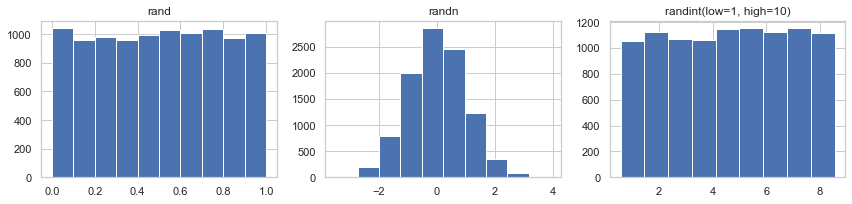

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()

In [14]:
np.random.choice(10, 5, replace=False) # replace: 표본 추출에서 복원을 동반할지 여부 지정

array([7, 8, 5, 6, 3])

시드: 랜덤 수 발생기를 특정 상태로 초기화하는 숫자로 특정 숫자로 시딩하면 항상 동일한 랜덤 수 생성

In [15]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [16]:
# RandomState 클래스는 선택적으로 초기화를 위한 시드 인수를 정수로 취함
prng = np.random.RandomState(123456789)
prng.randn(2, 4) # 정규 분포를 따르는 랜덤 수 생성

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

통계에서 발생하는 많은 확률 분포를 따르는 함수 또는 RandomState 
- x<sup>2</sup> 분포 (chisquare)
- 스튜던트-t 분포
- F 분포

In [17]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [18]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [19]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [20]:
prng.binomial(10, 0.5, size=10) # 이산 이항 분포

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [21]:
prng.poisson(5, size=10) # 푸아송 분포

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

## 확률 변수 및 분포
**확률 분포 기본 클래스**
- 이산형 분포 : rv_discrete
- 연속형 분포 : rv_instaluous

**Scipy의 stats모듈의 확률 변수 클래스**
- 기술 통계량 계산이나 그래프 작성에 사용할 수 있는 분포를 나타냄
- rvs 메서드를 사용해 주어진 분포를 따르는 랜덤 수 생성

In [22]:
# 평균이 1.0, 표준편차가 0.5인 정규분포 확률 변수 생성
X = stats.norm(1, 0.5)

In [23]:
# 확률 변수의 기술 통계량 계산
X.mean()

1.0

In [24]:
X.median()

1.0

In [25]:
X.std()

0.5

In [26]:
X.var()

0.25

In [27]:
# 임의 차수의 비중심 모멘트
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [28]:
# 분포-종속 통계량 리스트 (정규분포 확률 변수에 대한 평균과 분산)
X.stats()

(array(1.), array(0.25))

pdf: 확률 분포 함수   
cdf: 누적 분포 함수   
sf: 생존 함수

In [29]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [30]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

**interval**: 확률 분포 지정 비율의 하한과 상한값 계산하는데 사용 -> 신뢰 구간 계산과 도식화를 위한 x값의 범위 선택하는데 유용

In [31]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [32]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [33]:
# 확률 분포 함수의 99.9%를 포함하는 구간에서 stats 객체의 pdf, pnf, cdf, ppf 결과 도식화하는 함수
def plot_rv_distribution(X, axes=None):
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25) # 확률 분포의 95% 포함하는 구간 강조 표시
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

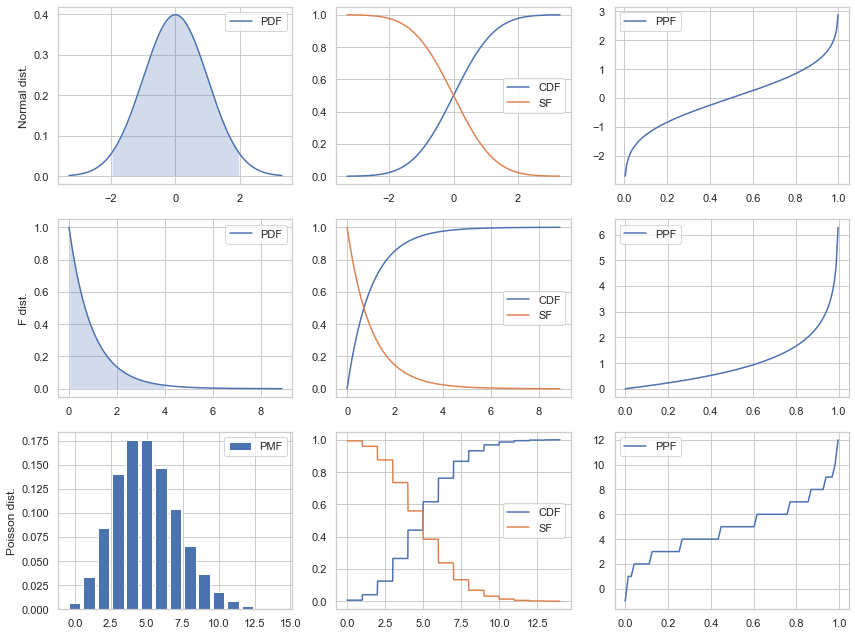

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm() # 정규분포
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50) # f 분포
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5) # 포아송 분포
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()

지금까지는 메서드 호출을 통해 인스턴스를 시작하고 통계량을 계산   
stats 모듈의 확률 변수 클래스를 사용하는 또 다른 방법은 클래스 메서드를 사용하고 분포 매개변수를 인수로 전달하는 것

In [35]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [36]:
# 위와 동일한 결과로 클래스 인스턴스를 먼저 만들고 해당 메서드 호출
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [37]:
# 주어진 확률 분포에 따라 분포하는 랜덤 수를 추출하려면 rvs 메서드 사용
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

결과 랜덤 수가 실제로 해당 확률 분포에 따라 분포하는지 알아보기 위해 확률 변수 상당수의 표본을 히스토그램으로 표시하고 확률 분포 함수와 비교

In [38]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

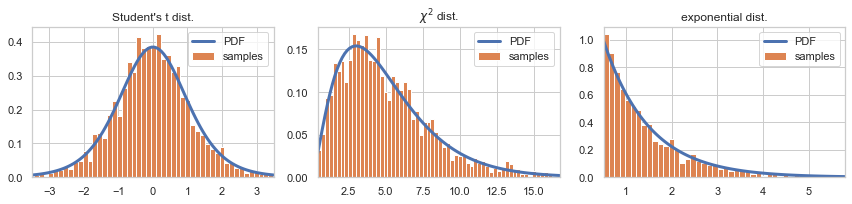

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0) # 스튜던트-t 분포
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0) # 카이-제곱 분포
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5) # 지수 분포
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()

자유도가 5인 x<sup>2</sup> 분포에서 500개 랜덤 표본 추출 후 fit 메서드를 사용해 확률 변수 x<sup>2</sup> 분포에 재적합화하기

In [40]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples) # fit 메서드는 주어진 데이터로 분포의 최대 우도 매개변수를 반환
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

In [41]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

최대 우도 매개변수를 stats.chi2의 초기화로 전달하여 생성한 Y는 X의 확률 분포와 유사해야함 -> 이를 검증하기 위해 두 확률 변수에 대한 확률 분포 함수 표기

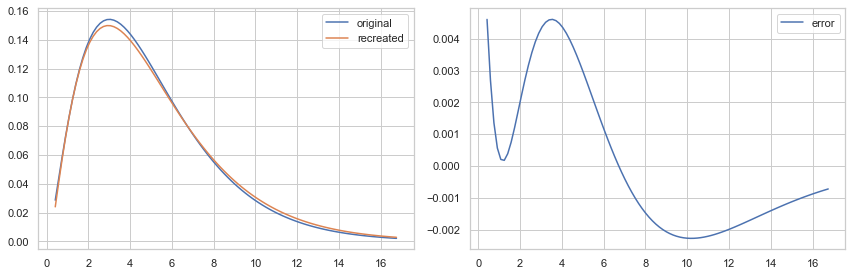

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax[0].plot(x, X.pdf(x), label="original")
ax[0].plot(x, Y.pdf(x), label="recreated")
ax[0].legend()

ax[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
ax[1].legend()

fig.tight_layout()

## 가설 검정


**가설 검정**: 가설의 타당성 여부를 데이터에 기초해 평가하는 체계적인 방법론이자 통계학의 중요한 응용    
**귀무가설**과 **대립 가설**은 반드시 상호 배타적이고 상호 보완적이어야 하므로 둘 중 하나만이 진실
귀무 가설과 대립 가설이 정의된다면
1. 데이터 수집
2. 귀무 가설에서 확률 분포 함수를 찾을 수 있는 검정 통계량 찾기
3. 검정 통계량의 관측값이 얻어질 확률(p-value)을 계산해 데이터 평가
    -> p-value가 임곗값보다 작으면 귀무 가설 분포에 의해 기술됐을 가능성이 낮다고 결론 -> 대립 가설을 받아들이고 귀무 가설 기각
    
**가설 검정의 두 가지 유형의 오류**
1. 제 1형 오류: 기각돼서는 안되는 귀무 가설을 잘못 기각
2. 제 2형 오류: 귀무 가설이 기각돼야 하지만 오류로 인해 기각 되지 않은 경우

아래 예시는 확률 변수 X의 평균이 1이라고 주장하는 귀무 가설을 고려하기   
여기서는 귀무 가설에서 주장하는 것과 약간 다른 분포에서 100개의 랜덤 표본 추출하여 표본 시뮬레이션

In [63]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

In [64]:
# X_samples의 검정 통계량 계산
# 모집단의 표준편차를 알고있다면 정규분포 식 사용
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-2.517134174164366

In [65]:
# 모집단의 분산을 알 수 없다면 표본 표준편차를 대신 사용 -> 대신 검정통계량 t는 정규 분포가 아닌 스튜던트-t 분포를 따름
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-2.553694879677088

In [66]:
# 위의 관측 통계량이 유의 수준 5%의 임곗값 -1.96보다 작으므로 귀무 가설을 기각할 충분한 근거가 됨
stats.norm().ppf(0.025)

-1.9599639845400545

In [67]:
# cdf 메서드를 사용해 p-값을 명시적으로 계산
2 * stats.norm().cdf(-abs(z))

0.011831376357847031

In [68]:
# t 분포 사용 -> 여기서도 p-값이 매우 작아 귀무 가설 기각
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.012183881436738316

In [69]:
# 위의 과정을 Scipy의 stats 모듈을 이용해 검정 통계량과 p-값 바로 계산 가능
t, p = stats.ttest_1samp(X_samples, mu)
t

1.5044040582150233

In [70]:
p

0.13566105599519857

C:\Users\lhg26\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


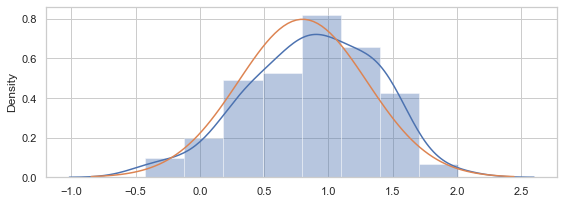

In [71]:
# 귀무 가설에 해당하는 분포를 표본 데이터와 함께 표시하기
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()

또 다른 예로 2개의 확률 변수의 모집단 평균이 동일하다는 귀무 가설에 대한 2-변수 문제 살펴보기   
-> 이러한 유형의 검정은 두 확률 변수를 정규 분포로부터 임의로 고른 모집단 평균에서 추출하여 시뮬레이션 가능

In [75]:
# 확률 변수별로 50개의 표본 선택하기
n,sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [76]:
# stats.text_ind를 사용해 두 독립 표본의 t-검정 수행
t, p = stats.ttest_ind(X1_sample, X2_sample)
print(t, p)

4.159179688426205 6.853597178246097e-05


위의 결과 p-값은 귀무 가설을 기각하고 두 모집단 평균이 다르다고 판단할 수 있을 만큼 작지 않음   
이 예에서 두 모집단의 평균이 다름

In [77]:
mu1, mu2

(0.9752488719173192, 0.24670384862275396)

그러나 이 분포에서 추출한 특정 표본은 통계적으로 이들 평균이 다르다는 것을 증명하지 못함 -> **2형 오류**   
즉 검정력을 높이려면 표본 수를 늘려야 함

## 비매개변수 기법
**매개변수적**: 표본 데이터가 주어지면 분포 매개변수에 대한 최대 우도 최적화를 사용해 분포 함수를 적합화   
**커널 밀도 추정**: 미지의 분포 함수를 표현하는 대안적 접근법 -> 히스토그램의 평활화 버전으로 볼 수 있음

C:\Users\lhg26\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


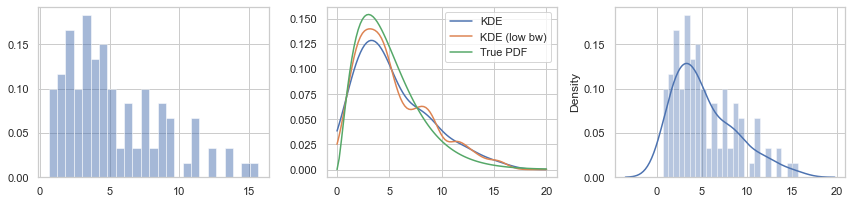

In [79]:
# 미지의 분포를 가진 확률 분포 X에서 추출쵠 표본 집합, 자유도는 5
X = stats.chi2(df=5)
X_samples = X.rvs(100)

# KDE 계산
kde = stats.kde.gaussian_kde(X_samples)

# bw_method 인수를 사용해 대역폭 직접 설정
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

# 표본의 실제 확률 분포 함수 표시

x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()

In [80]:
# KDE가 주어지면 resample 메서드를 사용해 그 값으로 새로운 랜덤 수 생성 가능
kde.resample(10)

array([[ 3.07539515,  2.60499515,  7.71842629, 10.82963413,  1.64930136,
         4.32892284, 10.24788743, 15.3480213 , 10.57674321,  8.35401643]])

In [81]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x) # 1차원 KDE의 경우 CDF 얻기
kde_cdf = np.vectorize(_kde_cdf)

In [82]:
# 그 역을 찾기
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf)

KDE 값에 대한 CDF와 PPF를 사용하면 통계 가설 검정을 수행하고 신뢰 구간 계산 가능

In [83]:
kde_ppf([0.05, 0.95]) # 90%의 신뢰 구간 계산

array([ 0.3681289 , 12.58920315])

통계 문제에 대한 확률 분포를 나타내는 KDE를 갖게 되면 매개변수적 통계에서 사용하는 것과 같은 방법 사용 가능